# Sample Analysis with Sodapy and Socrata Query Language (SoQL)
Author: Mark Bauer

Table of Contents
=================

   1. Introduction
   2. Importing Libraries
   3. Analyzing Datasets on NYC Open Data    
       * 3.1 Analyzing NYC Datasets with the Most Downloads
       * 3.2 Analyzing NYC Datasets with the Most Page Views
   4. Answering Questions about NYC 311 Complaints
       * 4.1 Most NYC 311 Complaints by Complaint Type
       * 4.2 Most NYC 311 Complaints by Day
   5. Answering questions about NYC 311 Street Flooding Complaints
       * 5.1 Searching the dataset for the word "flood" in the complaint_type field
       * 5.2 Searching the dataset for the word "flood" in the descriptor field
       * 5.3 Displaying the highest number of street flooding complaints by day
       * 5.4 Selecting the rows and columns where the descriptor field = 'Street Flooding'      

# 1. Introduction  
This notebook demonstrates a basic analysis using SoQL, the Socrata Query Language. 

# 2. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import urllib.parse

sns.set_theme()
plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
## documention for installing watermark: https://github.com/rasbt/watermark
%reload_ext watermark
%watermark -t -d -v -p pandas,sodapy

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

pandas: 1.4.3
sodapy: 2.1.1



# 3. Analyzing Datasets on NYC Open Data
Note: `WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

## 3.1 Analyzing NYC Datasets with the Most Downloads

In [3]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame.from_records(client.datasets())
client.close()

print(df.shape)
df.head()

(3342, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': ['economy', 'environment', 'hou...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': ['transportation', 'environment...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [4]:
# reading the dictionary in the resource column into a pandas DataFrame
df = pd.DataFrame.from_records(df.resource)

print(df.shape)
df.head()

(3342, 25)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T18:55:30.000Z,2015-07-16T17:33:32.000Z,...,"[Text, Text, Text, Text, Text, Calendar date, ...","[Base Address, Last Time Updated, Permit activ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",459469,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-04-23T13:11:02.000Z,2016-06-14T21:12:15.000Z,...,"[Text, Number, Text, Text, Text, Number, Text,...",[A “Parent Legacy credit” is an additional cre...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",62011,official,tabular,table,None,False,2024-01-12T16:15:05.000Z
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-04-23T20:11:01.000Z,2013-04-18T15:18:56.000Z,...,"[Text, Text, Text, Text, Text, Text, Text, Tex...","[Date when job is assigned to plan examiner, L...","[{'align': 'right'}, {'align': 'right'}, {'ali...",55267,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T16:02:29.000Z,2016-05-17T18:43:43.000Z,...,"[Text, Text, Text, Calendar date, Text, Text, ...",[This is the classification of license you hav...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39159,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T18:57:07.000Z,2015-07-16T17:24:02.000Z,...,"[Text, Calendar date, Calendar date, Text, Tex...","[WAV if Wheelchair Accessible Trained\n, Last ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",390767,official,tabular,table,None,False,2024-01-11T19:58:17.000Z


In [5]:
# group count of datasets by agency
data = (
    df
    .groupby(by='attribution')['name']
    .count()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'name':'count'})
    .head(20)
)

data.head()

,attribution,count
0,NYC Department of Education,524
1,Office of Technology and Innovation (OTI),250
2,Department of Education (DOE),203
3,Department of Parks and Recreation (DPR),196
4,Department of Transportation (DOT),193


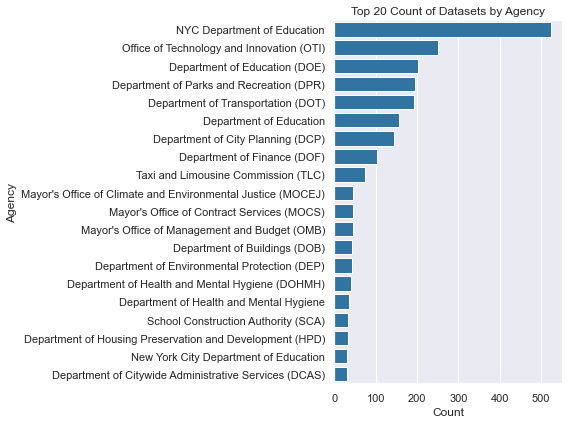

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='attribution',
    x='count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 20 Count of Datasets by Agency')
plt.xlabel('Count')
plt.ylabel('Agency')
plt.tight_layout()

plt.savefig('figures/datasets-count.png', dpi=250, bbox_inches='tight')

In [7]:
# Sorting the datasets by download_count
data = (
    df
    .loc[:, ['attribution', 'name', 'download_count']]
    .sort_values(by='download_count', ascending=False)
    .head(10)
)

data['full_name'] = data['name']  + ':\n' + data['attribution']

data.head()

,attribution,name,download_count,full_name
45,Department of Health and Mental Hygiene (DOHMH),Air Quality,649906,Air Quality:\nDepartment of Health and Mental ...
0,Taxi and Limousine Commission (TLC),For Hire Vehicles (FHV) - Active,459469,For Hire Vehicles (FHV) - Active:\nTaxi and Li...
5,311,311 Service Requests from 2010 to Present,434081,311 Service Requests from 2010 to Present:\n311
1138,Department of Transportation (DOT),Overhead Electronic Signs,429755,Overhead Electronic Signs:\nDepartment of Tran...
167,Department of Homeless Services (DHS),Directory Of Homebase Locations,421553,Directory Of Homebase Locations:\nDepartment o...


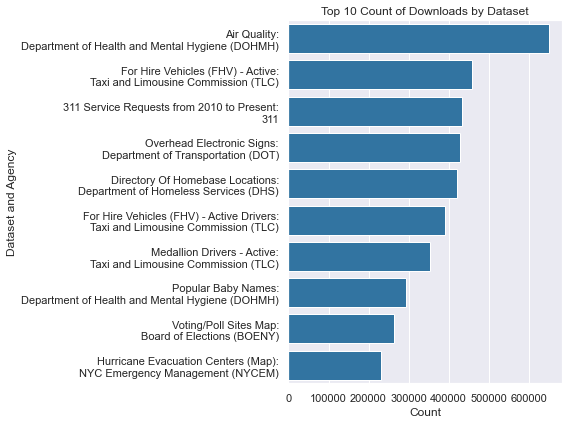

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='full_name',
    x='download_count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Count of Downloads by Dataset')
plt.xlabel('Count')
plt.ylabel('Dataset and Agency')
plt.tight_layout()

plt.savefig('figures/datasets-download.png', dpi=250, bbox_inches='tight')

In [9]:
data = (
    df
    .groupby(by='attribution')['download_count']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(20)
)

data['download_count'] = data['download_count'] / 1e6

data

,attribution,download_count
0,Taxi and Limousine Commission (TLC),1.730256
1,Department of Health and Mental Hygiene (DOHMH),1.233893
2,Department of City Planning (DCP),0.981027
3,Department of Transportation (DOT),0.693284
4,Department of Finance (DOF),0.613925
5,Department of Education (DOE),0.593550
6,Department of Homeless Services (DHS),0.558492
7,Police Department (NYPD),0.516646
8,311,0.509913
9,Office of Technology and Innovation (OTI),0.490108


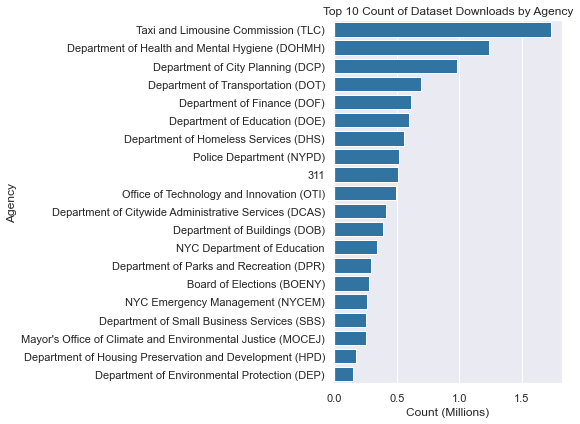

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='attribution',
    x='download_count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Count of Dataset Downloads by Agency')
plt.xlabel('Count (Millions)')
plt.ylabel('Agency')
plt.tight_layout()

plt.savefig('figures/agency-downloads.png', dpi=250, bbox_inches='tight')

In [11]:
(df
 .groupby(by='attribution')['download_count']
 .mean()
 .sort_values(ascending=False)
 .round(0)
 .astype(int)
 .reset_index()
 .rename(columns={'download_count':'download_count_avg'})
 .head(20)
)

,attribution,download_count_avg
0,Board of Elections (BOENY),91327
1,NYC Management Department (NYCEM),41530
2,Department of Health and Mental Hygiene (DOHMH),30095
3,311,26838
4,Department of Homeless Services (DHS),26595
5,Metropolitan Transportation Authority (MTA),26274
6,Office of Payroll Administration (OPA),25590
7,Mayor’s Office of Media and Entertainment (MOME),23508
8,Taxi and Limousine Commission (TLC),23382
9,NYC Emergency Management (NYCEM),20171


In [12]:
(df
 .groupby(by='attribution')['download_count']
 .median()
 .sort_values(ascending=False)
 .round(0)
 .astype(int)
 .reset_index()
 .rename(columns={'download_count':'download_count_median'})
 .head(20)
)

,attribution,download_count_median
0,NYC Management Department (NYCEM),41530
1,Metropolitan Transportation Authority (MTA),26274
2,Office of Payroll Administration (OPA),25590
3,Mayor’s Office of Media and Entertainment (MOME),23508
4,Broadway Theater,18531
5,Office of Administrative Trials and Hearings (...,16652
6,Department of Mental Health and Hygeine,10361
7,Department of Edcuation,9675
8,Office of Citywide Event Coordination and Mana...,8755
9,Board of Elections (BOENY),8202


## 3.2 Analyzing NYC Datasets with the Most Page Views

In [13]:
client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame.from_records(client.datasets())
client.close()

df = pd.DataFrame.from_records(df.resource)

print(df.shape)
df.head()

(3342, 25)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T18:55:30.000Z,2015-07-16T17:33:32.000Z,...,"[Text, Text, Text, Text, Text, Calendar date, ...","[Base Address, Last Time Updated, Permit activ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",459469,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-04-23T13:11:02.000Z,2016-06-14T21:12:15.000Z,...,"[Text, Number, Text, Text, Text, Number, Text,...",[A “Parent Legacy credit” is an additional cre...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",62011,official,tabular,table,None,False,2024-01-12T16:15:05.000Z
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-04-23T20:11:01.000Z,2013-04-18T15:18:56.000Z,...,"[Text, Text, Text, Text, Text, Text, Text, Tex...","[Date when job is assigned to plan examiner, L...","[{'align': 'right'}, {'align': 'right'}, {'ali...",55267,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T16:02:29.000Z,2016-05-17T18:43:43.000Z,...,"[Text, Text, Text, Calendar date, Text, Text, ...",[This is the classification of license you hav...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",39159,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T18:57:07.000Z,2015-07-16T17:24:02.000Z,...,"[Text, Calendar date, Calendar date, Text, Tex...","[WAV if Wheelchair Accessible Trained\n, Last ...","[{'displayStyle': 'plain', 'align': 'left'}, {...",390767,official,tabular,table,None,False,2024-01-11T19:58:17.000Z


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3342 non-null   object
 1   id                   3342 non-null   object
 2   parent_fxf           3342 non-null   object
 3   description          3342 non-null   object
 4   attribution          3170 non-null   object
 5   attribution_link     438 non-null    object
 6   contact_email        0 non-null      object
 7   type                 3342 non-null   object
 8   updatedAt            3342 non-null   object
 9   createdAt            3342 non-null   object
 10  metadata_updated_at  3342 non-null   object
 11  data_updated_at      3164 non-null   object
 12  page_views           3342 non-null   object
 13  columns_name         3342 non-null   object
 14  columns_field_name   3342 non-null   object
 15  columns_datatype     3342 non-null   object
 16  column

In [15]:
df['page_views'].head()

0    {'page_views_last_week': 8582, 'page_views_las...
1    {'page_views_last_week': 5584, 'page_views_las...
2    {'page_views_last_week': 718, 'page_views_last...
3    {'page_views_last_week': 132, 'page_views_last...
4    {'page_views_last_week': 3076, 'page_views_las...
Name: page_views, dtype: object

In [16]:
# we need to explode those columns from that dictionary to separate columns in df
df = pd.concat(
    [df.drop(['page_views'], axis=1), df['page_views'].apply(pd.Series)],
    axis=1
)

df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_display_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T18:55:30.000Z,2015-07-16T17:33:32.000Z,...,table,None,False,2021-04-05T13:20:47.000Z,8582.0,36950.0,2657120.0,13.067266,15.173326,21.341432
1,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-04-23T13:11:02.000Z,2016-06-14T21:12:15.000Z,...,table,None,False,2024-01-12T16:15:05.000Z,5584.0,21374.0,2606637.0,12.447342,14.383637,21.313759
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-04-23T20:11:01.000Z,2013-04-18T15:18:56.000Z,...,table,None,False,2020-06-22T18:23:35.000Z,718.0,2731.0,2348985.0,9.489848,11.415742,21.163607
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T16:02:29.000Z,2016-05-17T18:43:43.000Z,...,table,None,False,2019-12-17T18:44:57.000Z,132.0,636.0,1726969.0,7.055282,9.315150,20.719812
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-04-23T18:57:07.000Z,2015-07-16T17:24:02.000Z,...,table,None,False,2024-01-11T19:58:17.000Z,3076.0,12807.0,1401242.0,11.587309,13.644758,20.418276


In [17]:
data = (
    df
    .loc[:, ['attribution', 'name', 'page_views_total']]
    .sort_values(by='page_views_total', ascending=False)
    .head(10)
)

data['full_name'] =  + data['name'] + ':\n' + data['attribution']
data['page_views_total'] = data['page_views_total'] / 1e6

data

,attribution,name,page_views_total,full_name
0,Taxi and Limousine Commission (TLC),For Hire Vehicles (FHV) - Active,2.657120,For Hire Vehicles (FHV) - Active:\nTaxi and Li...
1,Department of Citywide Administrative Services...,Civil Service List (Active),2.606637,Civil Service List (Active):\nDepartment of Ci...
2,Department of Buildings (DOB),DOB Job Application Filings,2.348985,DOB Job Application Filings:\nDepartment of Bu...
3,Taxi and Limousine Commission (TLC),TLC New Driver Application Status,1.726969,TLC New Driver Application Status:\nTaxi and L...
4,Taxi and Limousine Commission (TLC),For Hire Vehicles (FHV) - Active Drivers,1.401242,For Hire Vehicles (FHV) - Active Drivers:\nTax...
5,311,311 Service Requests from 2010 to Present,0.829836,311 Service Requests from 2010 to Present:\n311
6,Department of Citywide Administrative Services...,Civil Service List Certification,0.746349,Civil Service List Certification:\nDepartment ...
7,Office of Payroll Administration (OPA),Citywide Payroll Data (Fiscal Year),0.621615,Citywide Payroll Data (Fiscal Year):\nOffice o...
8,Police Department (NYPD),Motor Vehicle Collisions - Crashes,0.538707,Motor Vehicle Collisions - Crashes:\nPolice De...
9,Department of Buildings (DOB),DOB Permit Issuance,0.477656,DOB Permit Issuance:\nDepartment of Buildings ...


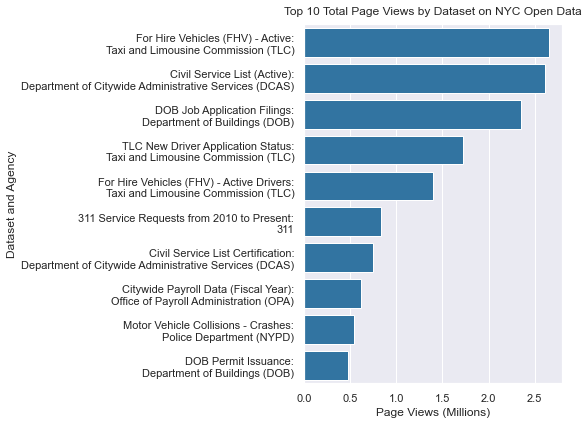

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    data=data,
    y='full_name',
    x='page_views_total',
    color='#1f77b4',
    ax=ax
)

plt.title(
    'Top 10 Total Page Views by Dataset on NYC Open Data',
    fontsize=12, pad=10
)
plt.xlabel('Page Views (Millions)')
plt.ylabel('Dataset and Agency')
plt.tight_layout()

plt.savefig('figures/pageviews-dataset.png', dpi=250, bbox_inches='tight')

# 4. Answering Questions about NYC 311 Complaints with SoQL
Note: `WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

Read more from the SODA documentation here: https://dev.socrata.com/docs/app-tokens.html

## 4.1 Most NYC 311 Complaints by Complaint Type

In [19]:
# Source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

# Dataset id for NYC 311 on NYC Open Data on Socrata
socrata_dataset_identifier = 'erm2-nwe9'

# Socrata - The main class that interacts with the SODA API. We pass the source domain value
# of NYC Open data, the app token as 'None', and set the timeout parameter for '1,000 seconds'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select the complaint_type and the count of complaint_type columns 
# grouped by complaint_type, sorted by the count of complaint_type in descending order
# and limit our records to 10

query = """
SELECT 
    complaint_type, 
    count(unique_key) AS count
GROUP BY 
    complaint_type
ORDER BY 
    count DESC
LIMIT 
    10
"""

# Requesting data from the NYC 311 dataset and passing our query as a full SoQL query string

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (10, 2)


,complaint_type,count
0,Noise - Residential,3340726
1,Illegal Parking,2464919
2,HEAT/HOT WATER,2213285
3,Blocked Driveway,1565414
4,Street Condition,1259879
5,Noise - Street/Sidewalk,1187134
6,Street Light Condition,1137719
7,Request Large Bulky Item Collection,1073753
8,PLUMBING,938192
9,HEATING,887869


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   complaint_type  10 non-null     object
 1   count           10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [21]:
# cast as int and convert to MM
df['count'] = df['count'].astype(int) / 1e6

# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   complaint_type  10 non-null     object 
 1   count           10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


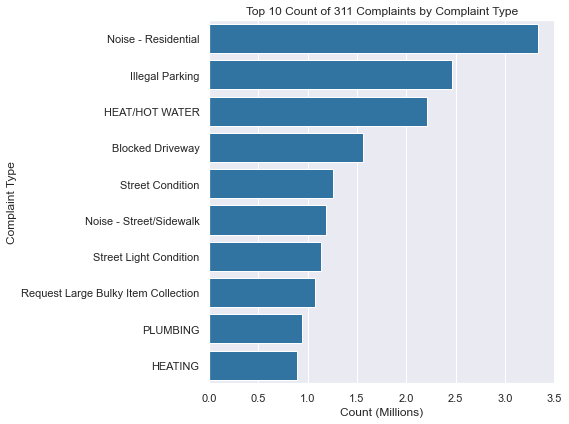

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

data = df.sort_values(by='count', ascending=False)

sns.barplot(
    data=data,
    y='complaint_type',
    x='count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Count of 311 Complaints by Complaint Type')
plt.xlabel('Count (Millions)')
plt.ylabel('Complaint Type')
plt.tight_layout()

plt.savefig('figures/complaint-type.png', dpi=250, bbox_inches='tight')

In [23]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select the complaint_type and the count of complaint_type columns 
# grouped by complaint_type, sorted by the count of complaint_type in descending order
# and limit our records to 10

query = """
SELECT 
    complaint_type, 
    descriptor,
    count(unique_key) AS count
GROUP BY 
    complaint_type, descriptor
ORDER BY 
    count DESC
LIMIT 
    10
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (10, 3)


,complaint_type,descriptor,count
0,Noise - Residential,Loud Music/Party,2206300
1,HEAT/HOT WATER,ENTIRE BUILDING,1445486
2,Blocked Driveway,No Access,1164921
3,Request Large Bulky Item Collection,Request Large Bulky Item Collection,1073753
4,Noise - Street/Sidewalk,Loud Music/Party,924813
5,Noise - Residential,Banging/Pounding,873123
6,HEATING,HEAT,868960
7,Street Light Condition,Street Light Out,837034
8,HEAT/HOT WATER,APARTMENT ONLY,767799
9,Street Condition,Pothole,761232


In [24]:
# cast to int and convert to MM
df['count'] = df['count'].astype(int) / 1e6
df['type_full'] =  df['descriptor'] + ':\n' + df['complaint_type']

# sanity check
df.head()

,complaint_type,descriptor,count,type_full
0,Noise - Residential,Loud Music/Party,2.206300,Loud Music/Party:\nNoise - Residential
1,HEAT/HOT WATER,ENTIRE BUILDING,1.445486,ENTIRE BUILDING:\nHEAT/HOT WATER
2,Blocked Driveway,No Access,1.164921,No Access:\nBlocked Driveway
3,Request Large Bulky Item Collection,Request Large Bulky Item Collection,1.073753,Request Large Bulky Item Collection:\nRequest ...
4,Noise - Street/Sidewalk,Loud Music/Party,0.924813,Loud Music/Party:\nNoise - Street/Sidewalk


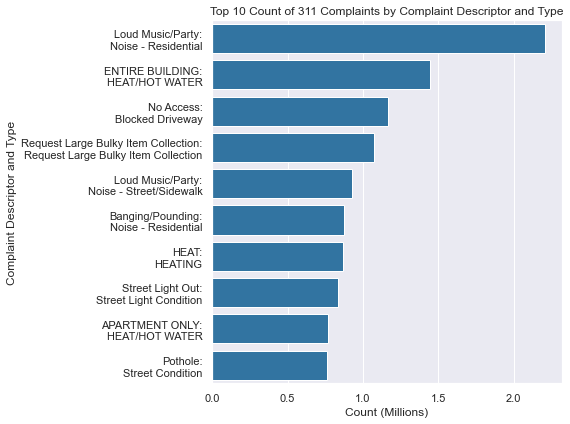

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

data = df.sort_values(by='count', ascending=False)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Count of 311 Complaints by Complaint Descriptor and Type')
plt.xlabel('Count (Millions)')
plt.ylabel('Complaint Descriptor and Type')
plt.tight_layout()

plt.savefig('figures/descriptor-type.png', dpi=250, bbox_inches='tight')

## 4.2 Most NYC 311 Complaints by Day

In [26]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
SELECT 
    date_trunc_ymd(created_date) AS day, 
    count(unique_key) AS count
GROUP BY 
    day
ORDER BY 
    count DESC
LIMIT 
    10
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (10, 2)


,day,count
0,2020-08-04T00:00:00.000,24415
1,2020-08-05T00:00:00.000,19560
2,2023-09-29T00:00:00.000,17962
3,2020-07-05T00:00:00.000,16916
4,2020-06-21T00:00:00.000,15883
5,2020-06-20T00:00:00.000,15825
6,2020-07-04T00:00:00.000,15794
7,2024-04-15T00:00:00.000,15774
8,2021-09-02T00:00:00.000,15205
9,2020-06-28T00:00:00.000,14057


In [27]:
# casting to different dtypes
df['day_fmt'] = pd.to_datetime(df['day']).astype(str)
df['count'] = df['count'].astype(int)

# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   day      10 non-null     object
 1   count    10 non-null     int64 
 2   day_fmt  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


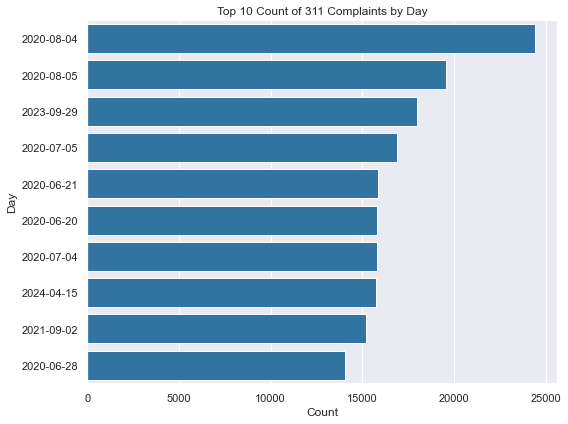

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

data = df.sort_values(by='count', ascending=False)

sns.barplot(
    data=data,
    y='day_fmt',
    x='count',
    color='#1f77b4',
    ax=ax
)

plt.title('Top 10 Count of 311 Complaints by Day')
plt.xlabel('Count')
plt.ylabel('Day')
plt.tight_layout()

plt.savefig('figures/day-top.png', dpi=250, bbox_inches='tight')

## Lineplot of NYC 311 Complaints by Day

In [29]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
SELECT 
    date_trunc_ymd(created_date) AS day, 
    count(unique_key) AS count
GROUP BY 
    day
ORDER BY 
    count DESC
LIMIT 
    10000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (5226, 2)


,day,count
0,2020-08-04T00:00:00.000,24415
1,2020-08-05T00:00:00.000,19560
2,2023-09-29T00:00:00.000,17962
3,2020-07-05T00:00:00.000,16916
4,2020-06-21T00:00:00.000,15883
5,2020-06-20T00:00:00.000,15825
6,2020-07-04T00:00:00.000,15794
7,2024-04-15T00:00:00.000,15774
8,2021-09-02T00:00:00.000,15205
9,2020-06-28T00:00:00.000,14057


In [30]:
# cast day to datetime and count as int and save out CSV
df['day_fmt'] = pd.to_datetime(df['day'])
df['count']  = df['count'].astype(int)

df.to_csv('data/complaints-day.csv', index=False)

In [31]:
# removing last two days to prevent incomplete days
df = (
    df
    .sort_values(by='day_fmt')
    .iloc[:-2, :]
)

df.tail()

,day,count,day_fmt
175,2024-04-16T00:00:00.000,10350,2024-04-16
583,2024-04-17T00:00:00.000,9241,2024-04-17
810,2024-04-18T00:00:00.000,8854,2024-04-18
557,2024-04-19T00:00:00.000,9288,2024-04-19
1504,2024-04-20T00:00:00.000,7953,2024-04-20


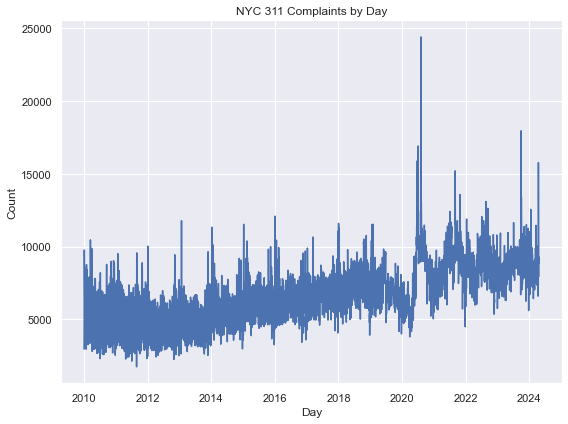

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .set_index('day_fmt')
    .loc[:, ['count']]
    .astype(int)
)

sns.lineplot(
    data=data,
    x=data.index,
    y='count',
    ax=ax
)

plt.title('NYC 311 Complaints by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.tight_layout()

plt.savefig('figures/day-line.png', dpi=250, bbox_inches='tight')

## Exploring Complaints on the Highest Day

In [33]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

query = """
SELECT 
    date_trunc_ymd(created_date) AS day,
    complaint_type, 
    descriptor,
    count(unique_key) AS count
WHERE
    date_trunc_ymd(created_date) == '2020-08-04T00:00:00.000'
GROUP BY 
    day, complaint_type, descriptor
ORDER BY 
    count DESC
LIMIT 
    100
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (100, 4)


,day,complaint_type,descriptor,count
0,2020-08-04T00:00:00.000,Damaged Tree,Entire Tree Has Fallen Down,7848
1,2020-08-04T00:00:00.000,Damaged Tree,Branch or Limb Has Fallen Down,4971
2,2020-08-04T00:00:00.000,Damaged Tree,Branch Cracked and Will Fall,1330
3,2020-08-04T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,909
4,2020-08-04T00:00:00.000,Noise - Residential,Loud Music/Party,762
5,2020-08-04T00:00:00.000,Damaged Tree,Tree Leaning/Uprooted,510
6,2020-08-04T00:00:00.000,Street Light Condition,Street Light Out,397
7,2020-08-04T00:00:00.000,Traffic Signal Condition,Controller,353
8,2020-08-04T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,263
9,2020-08-04T00:00:00.000,Blocked Driveway,No Access,259


In [34]:
# casting as int
df['count'] = df['count'].astype(int)
df['type_full'] =  df['descriptor']  + ':\n' + df['complaint_type']

df.head()

,day,complaint_type,descriptor,count,type_full
0,2020-08-04T00:00:00.000,Damaged Tree,Entire Tree Has Fallen Down,7848,Entire Tree Has Fallen Down:\nDamaged Tree
1,2020-08-04T00:00:00.000,Damaged Tree,Branch or Limb Has Fallen Down,4971,Branch or Limb Has Fallen Down:\nDamaged Tree
2,2020-08-04T00:00:00.000,Damaged Tree,Branch Cracked and Will Fall,1330,Branch Cracked and Will Fall:\nDamaged Tree
3,2020-08-04T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,909,Request Large Bulky Item Collection:\nRequest ...
4,2020-08-04T00:00:00.000,Noise - Residential,Loud Music/Party,762,Loud Music/Party:\nNoise - Residential


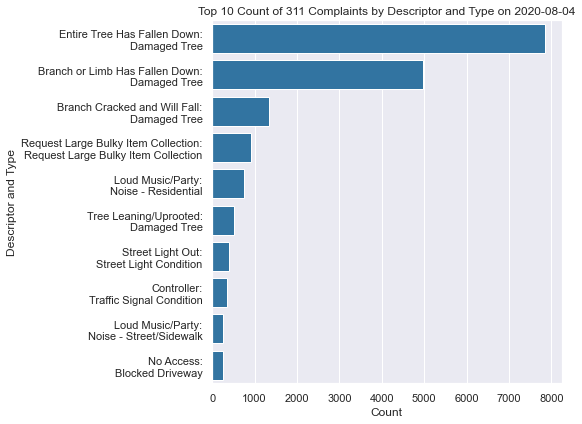

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .sort_values(by='count', ascending=False)
    .head(10)
)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

# retrieve date string
date = data.head(1)['day'].str.split('T').values[0][0]
plt.title('Top 10 Count of 311 Complaints by Descriptor and Type on {}'.format(date))

plt.xlabel('Count')
plt.ylabel('Descriptor and Type')
plt.tight_layout()

plt.savefig('figures/day-first.png', dpi=250, bbox_inches='tight')

### Most probable event is Tropical Storm Isaias.
Source: https://www.weather.gov/bgm/pastFloodAugust042020

## Exploring Complaints on the Second Highest Day

In [36]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

query = """
SELECT 
    date_trunc_ymd(created_date) AS day,
    complaint_type, 
    descriptor,
    count(unique_key) AS count
WHERE
    date_trunc_ymd(created_date) == '2023-09-29T00:00:00.000'
GROUP BY 
    day, complaint_type, descriptor
ORDER BY 
    count DESC
LIMIT 
    100
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (100, 4)


,day,complaint_type,descriptor,count
0,2023-09-29T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),1050
1,2023-09-29T00:00:00.000,Water Leak,Heavy Flow,1042
2,2023-09-29T00:00:00.000,WATER LEAK,HEAVY FLOW,1038
3,2023-09-29T00:00:00.000,Sewer Maintenance,Backup,1012
4,2023-09-29T00:00:00.000,Sewer,Street Flooding (SJ),623
5,2023-09-29T00:00:00.000,Sewer Maintenance,Flooding on Street,588
6,2023-09-29T00:00:00.000,Water Leak,Slow Leak,465
7,2023-09-29T00:00:00.000,WATER LEAK,SLOW LEAK,463
8,2023-09-29T00:00:00.000,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),394
9,2023-09-29T00:00:00.000,Noise - Residential,Loud Music/Party,363


In [37]:
# castint coun as int
df['count'] = df['count'].astype(int)
df['type_full'] = df['descriptor'] + ':\n' + df['complaint_type']

df.head()

,day,complaint_type,descriptor,count,type_full
0,2023-09-29T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),1050,Sewer Backup (Use Comments) (SA):\nSewer
1,2023-09-29T00:00:00.000,Water Leak,Heavy Flow,1042,Heavy Flow:\nWater Leak
2,2023-09-29T00:00:00.000,WATER LEAK,HEAVY FLOW,1038,HEAVY FLOW:\nWATER LEAK
3,2023-09-29T00:00:00.000,Sewer Maintenance,Backup,1012,Backup:\nSewer Maintenance
4,2023-09-29T00:00:00.000,Sewer,Street Flooding (SJ),623,Street Flooding (SJ):\nSewer


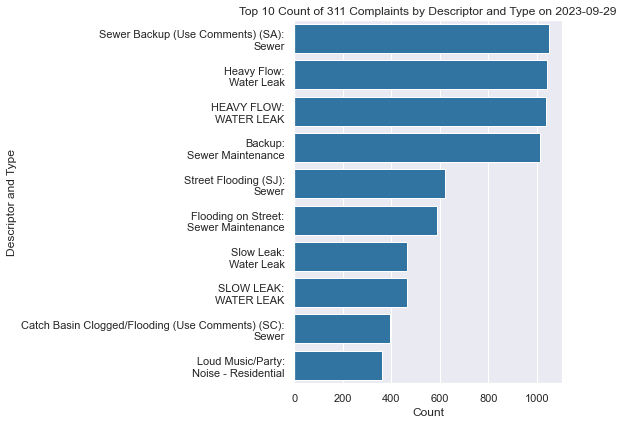

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .sort_values(by='count', ascending=False)
    .head(10)
)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

# retrieve date string
date = data.head(1)['day'].str.split('T').values[0][0]
plt.title('Top 10 Count of 311 Complaints by Descriptor and Type on {}'.format(date))

plt.xlabel('Count')
plt.ylabel('Descriptor and Type')
plt.tight_layout()

plt.savefig('figures/day-second.png', dpi=250, bbox_inches='tight')

### Most probable event is Tropical Storm Ophelia.
Source: https://en.wikipedia.org/wiki/September_2023_New_York_floods

## Exploring Complaints on the Third Highest Day

In [39]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

query = """
SELECT 
    date_trunc_ymd(created_date) AS day,
    complaint_type, 
    descriptor,
    count(unique_key) AS count
WHERE
    date_trunc_ymd(created_date) == '2020-07-05T00:00:00.000'
GROUP BY 
    day, complaint_type, descriptor
ORDER BY 
    count DESC
LIMIT 
    100
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (100, 4)


,day,complaint_type,descriptor,count
0,2020-07-05T00:00:00.000,Noise - Residential,Loud Music/Party,4334
1,2020-07-05T00:00:00.000,Illegal Fireworks,N/A,4199
2,2020-07-05T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,2837
3,2020-07-05T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,752
4,2020-07-05T00:00:00.000,Noise - Vehicle,Car/Truck Music,412
5,2020-07-05T00:00:00.000,Noise - Residential,Banging/Pounding,304
6,2020-07-05T00:00:00.000,Non-Emergency Police Matter,Social Distancing,239
7,2020-07-05T00:00:00.000,Blocked Driveway,No Access,206
8,2020-07-05T00:00:00.000,Noise - Commercial,Loud Music/Party,189
9,2020-07-05T00:00:00.000,Water System,Hydrant Running Full (WA4),188


In [40]:
# castint coun as int
df['count'] = df['count'].astype(int)
df['type_full'] = df['descriptor'] + ':\n' + df['complaint_type']

df.head()

,day,complaint_type,descriptor,count,type_full
0,2020-07-05T00:00:00.000,Noise - Residential,Loud Music/Party,4334,Loud Music/Party:\nNoise - Residential
1,2020-07-05T00:00:00.000,Illegal Fireworks,N/A,4199,N/A:\nIllegal Fireworks
2,2020-07-05T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,2837,Loud Music/Party:\nNoise - Street/Sidewalk
3,2020-07-05T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,752,Request Large Bulky Item Collection:\nRequest ...
4,2020-07-05T00:00:00.000,Noise - Vehicle,Car/Truck Music,412,Car/Truck Music:\nNoise - Vehicle


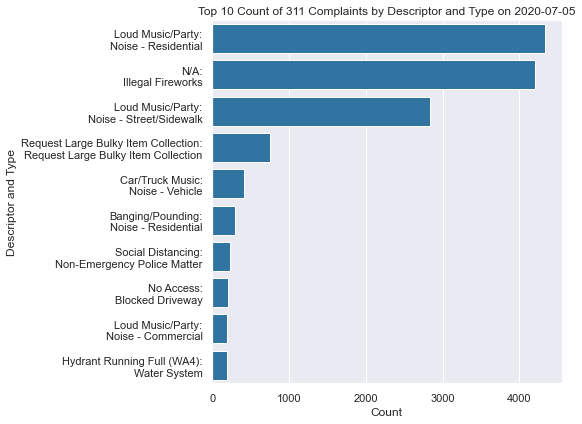

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

data = (
    df
    .sort_values(by='count', ascending=False)
    .head(10)
)

sns.barplot(
    data=data,
    y='type_full',
    x='count',
    color='#1f77b4',
    ax=ax
)

# retrieve date string
date = data.head(1)['day'].str.split('T').values[0][0]
plt.title('Top 10 Count of 311 Complaints by Descriptor and Type on {}'.format(date))

plt.xlabel('Count')
plt.ylabel('Descriptor and Type')
plt.tight_layout()

plt.savefig('figures/day-third.png', dpi=250, bbox_inches='tight')

### Most probable event is July 4th celebrations.
Source: https://abc7ny.com/nyc-shootings-2020-last-night-this-week-in/6299513/

## 5. Analyzing NYC 311 Street Flooding Complaints
Note: `WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

### 5.1 Searching the dataset for the word "flood" in the complaint_type field

In [42]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select complaint_type and count of complaint_type grouped by compaint_type,
# where the word "flood" is in compplaint_type, sort count in descending order and
# limit our records to 1,000

query = """
SELECT 
    complaint_type, 
    count(unique_key) AS count
WHERE 
    LOWER(complaint_type) LIKE '%flood%'
GROUP BY 
    complaint_type
ORDER BY 
    count(unique_key) DESC
LIMIT 
    1000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (0, 0)


""


### 5.2 Searching the dataset for the word "flood" in the descriptor field

In [43]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select complaint_type and count of complaint_type grouped by compaint_type,
# where the word "flood" is in descriptor, sort count in descending order and
# limit our records to 1,000

query = """
SELECT 
    complaint_type,
    descriptor,
    count(unique_key) AS count
WHERE 
    LOWER(descriptor) LIKE '%flood%'
GROUP BY 
    complaint_type, descriptor
ORDER BY 
    count(unique_key) DESC
LIMIT 
    1000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df

shape of data: (13, 3)


,complaint_type,descriptor,count
0,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),114680
1,Sewer,Street Flooding (SJ),39512
2,Street Light Condition,Flood Light Lamp Out,6517
3,Sewer,Highway Flooding (SH),3156
4,Street Light Condition,Flood Light Lamp Cycling,2595
5,Sewer Maintenance,Flooding on Street,673
6,OEM Literature Request,Ready NY - Flooding,271
7,Street Light Condition,Flood Light Lamp Dayburning,228
8,Street Light Condition,Flood Light Lamp Missing,212
9,Street Light Condition,Flood Light Lamp Dim,185


### 5.3 Displaying the highest number of street flooding complaints by day

In [44]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=100
)

# SoQL query string below: select the day and the count day columns grouped by day,
# where the descriptor is Street Flooding (SJ), sort the count in descending order and
# limit our records to 1,000

query = """
SELECT 
    date_trunc_ymd(created_date) as day, 
    count(created_date) AS count
WHERE 
    descriptor == 'Street Flooding (SJ)'
GROUP BY 
    day
ORDER BY 
    count DESC
LIMIT 
    1000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (1000, 2)


,day,count
0,2023-09-29T00:00:00.000,623
1,2021-09-02T00:00:00.000,350
2,2021-09-01T00:00:00.000,344
3,2022-12-23T00:00:00.000,308
4,2017-05-05T00:00:00.000,247


In [45]:
day = df.head(1)['day'][0].split('T')[0]
count = df.head(1)['count'][0]

print('The highest day of Street Flooding Complaints \
was on {} with {} total number of complaints.'.format(day, count))

The highest day of Street Flooding Complaints was on 2023-09-29 with 623 total number of complaints.


Let's use the date above to see other complaint types represented on that date.

In [46]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
SELECT 
    date_trunc_ymd(created_date) AS day,
    complaint_type, 
    descriptor,
    count(unique_key) AS count
WHERE
    date_trunc_ymd(created_date) == '2023-09-29T00:00:00.000'
GROUP BY 
    day, complaint_type, descriptor
ORDER BY 
    count DESC
LIMIT 
    1000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (495, 4)


,day,complaint_type,descriptor,count
0,2023-09-29T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),1050
1,2023-09-29T00:00:00.000,Water Leak,Heavy Flow,1042
2,2023-09-29T00:00:00.000,WATER LEAK,HEAVY FLOW,1038
3,2023-09-29T00:00:00.000,Sewer Maintenance,Backup,1012
4,2023-09-29T00:00:00.000,Sewer,Street Flooding (SJ),623
5,2023-09-29T00:00:00.000,Sewer Maintenance,Flooding on Street,588
6,2023-09-29T00:00:00.000,Water Leak,Slow Leak,465
7,2023-09-29T00:00:00.000,WATER LEAK,SLOW LEAK,463
8,2023-09-29T00:00:00.000,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),394
9,2023-09-29T00:00:00.000,Noise - Residential,Loud Music/Party,363


Let's use the second highest event above to see other complaint types represented on that date.

date of `'2021-09-02T00:00:00.000'`

In [47]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# SoQL query string below: select the day and count day grouped by day,
# sort by count in descending order and limit our records to 1,000

query = """
SELECT 
    date_trunc_ymd(created_date) AS day,
    complaint_type, 
    descriptor,
    count(unique_key) AS count
WHERE
    date_trunc_ymd(created_date) == '2021-09-02T00:00:00.000'
GROUP BY 
    day, complaint_type, descriptor
ORDER BY 
    count DESC
LIMIT 
    1000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head(10)

shape of data: (480, 4)


,day,complaint_type,descriptor,count
0,2021-09-02T00:00:00.000,Sewer,Sewer Backup (Use Comments) (SA),2372
1,2021-09-02T00:00:00.000,Request Large Bulky Item Collection,Request Large Bulky Item Collection,1350
2,2021-09-02T00:00:00.000,WATER LEAK,HEAVY FLOW,564
3,2021-09-02T00:00:00.000,Traffic Signal Condition,Controller,391
4,2021-09-02T00:00:00.000,Noise - Street/Sidewalk,Loud Music/Party,358
5,2021-09-02T00:00:00.000,Sewer,Street Flooding (SJ),350
6,2021-09-02T00:00:00.000,PAINT/PLASTER,CEILING,321
7,2021-09-02T00:00:00.000,Blocked Driveway,No Access,313
8,2021-09-02T00:00:00.000,Damaged Tree,Branch or Limb Has Fallen Down,303
9,2021-09-02T00:00:00.000,Sewer,Catch Basin Clogged/Flooding (Use Comments) (SC),295


### 5.4 Selecting the rows and columns where the descriptor field = 'Street Flooding'

In [48]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = 'erm2-nwe9'

client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=100
)

# SoQL query string below: select all columns where the descriptor is Street Flooding(SJ),
# sort the created date field in descending order and limit our records to 1,000

query = """
SELECT 
    *
WHERE 
    descriptor == 'Street Flooding (SJ)'
ORDER BY 
    created_date DESC
LIMIT 
    1000
"""

results = client.get(
    socrata_dataset_identifier,
    query=query
)
client.close()

df = pd.DataFrame(results)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (1000, 30)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,longitude,location,incident_address,street_name,cross_street_1,cross_street_2,bbl,closed_date,resolution_description,resolution_action_updated_date
0,60937647,2024-04-21T22:56:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10036,7 AVENUE,WEST 47 STREET,INTERSECTION,...,-73.98461925002192,"{'latitude': '40.7591997120635', 'longitude': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60937648,2024-04-21T21:59:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11217,NaN,NaN,ADDRESS,...,-73.97650143173598,"{'latitude': '40.68672300881048', 'longitude':...",92 FORT GREENE PLACE,FORT GREENE PLACE,LAFAYETTE AVE,HANSON PL,3021120032,NaN,NaN,NaN
2,60937649,2024-04-21T13:56:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11220,NaN,NaN,ADDRESS,...,-74.00949923604392,"{'latitude': '40.64826519646832', 'longitude':...",423 46 STREET,46 STREET,4 AVE,5 AVE,3007470067,NaN,NaN,NaN
3,60938666,2024-04-21T11:14:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11377,NaN,NaN,ADDRESS,...,-73.90441538293082,"{'latitude': '40.75729191233922', 'longitude':...",57-06 31 AVENUE,31 AVENUE,AMTRAK-NY/CONN RAIL LINE,58 ST,4011340019,NaN,NaN,NaN
4,60929521,2024-04-20T15:32:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11369,NaN,NaN,ADDRESS,...,-73.87361408066782,"{'latitude': '40.75969682793435', 'longitude':...",31-33 95 STREET,95 STREET,31 AVE,JACKSON MILL RD,4014070054,NaN,NaN,NaN
